In [1]:
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import optuna

import warnings
warnings.filterwarnings('ignore')

# 探索性数据分析（EDA）

## 读取数据集

In [2]:
data = pd.read_excel("./X_Aug_2023.xlsx", engine="openpyxl")

In [3]:
data.drop(["Date"], axis=1, inplace=True)

In [4]:
data

,Access_1_t,Access_1_v,Amenities_1,Attractions_1,Community_1_n,Community_1_p,E&A_1_s,E&A_1_p,E&A_1_c,E&A_1_e,...,Summer & Winter Break,Exchange Rate,month_visit,soc_mov_actual,soc_mov_media,hotel_occupancy,hotel_price,weather,enviroment_pm2.5,Hong Kong-Mainland China Border Crossing Policy
0,422,105,42,100,591,12,2,381,306,17,...,0,0.8033,1.258891,0,0,92,1522,19.3,27.687500,0
1,483,109,41,101,666,18,4,472,360,9,...,0,0.8085,1.406862,0,0,92,1323,23.3,30.062500,0
2,518,127,32,104,762,19,6,484,445,26,...,0,0.7992,1.029092,0,0,90,1357,26.0,23.875000,0
3,547,125,39,97,828,28,10,502,447,47,...,1,0.8068,1.229373,0,0,93,1433,28.8,23.812500,0
4,493,95,25,107,744,20,5,462,390,62,...,1,0.8172,1.106056,0,0,92,1456,28.7,13.812500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,347,129,223,170,2005,50,6,498,747,33,...,0,0.8832,-0.292519,0,0,66,1048,23.7,17.605311,0
62,535,158,104,212,1234,82,38,510,617,97,...,0,0.8748,0.152182,0,0,78,1162,25.0,19.048711,0
63,775,212,123,512,4454,74,21,738,1004,48,...,1,0.8804,0.326668,0,0,84,1390,28.6,16.161911,0
64,1854,781,503,1153,11381,162,95,1591,2634,96,...,1,0.9082,0.314941,0,0,86,1532,30.3,15.440211,0


## 变量分布信息可视化

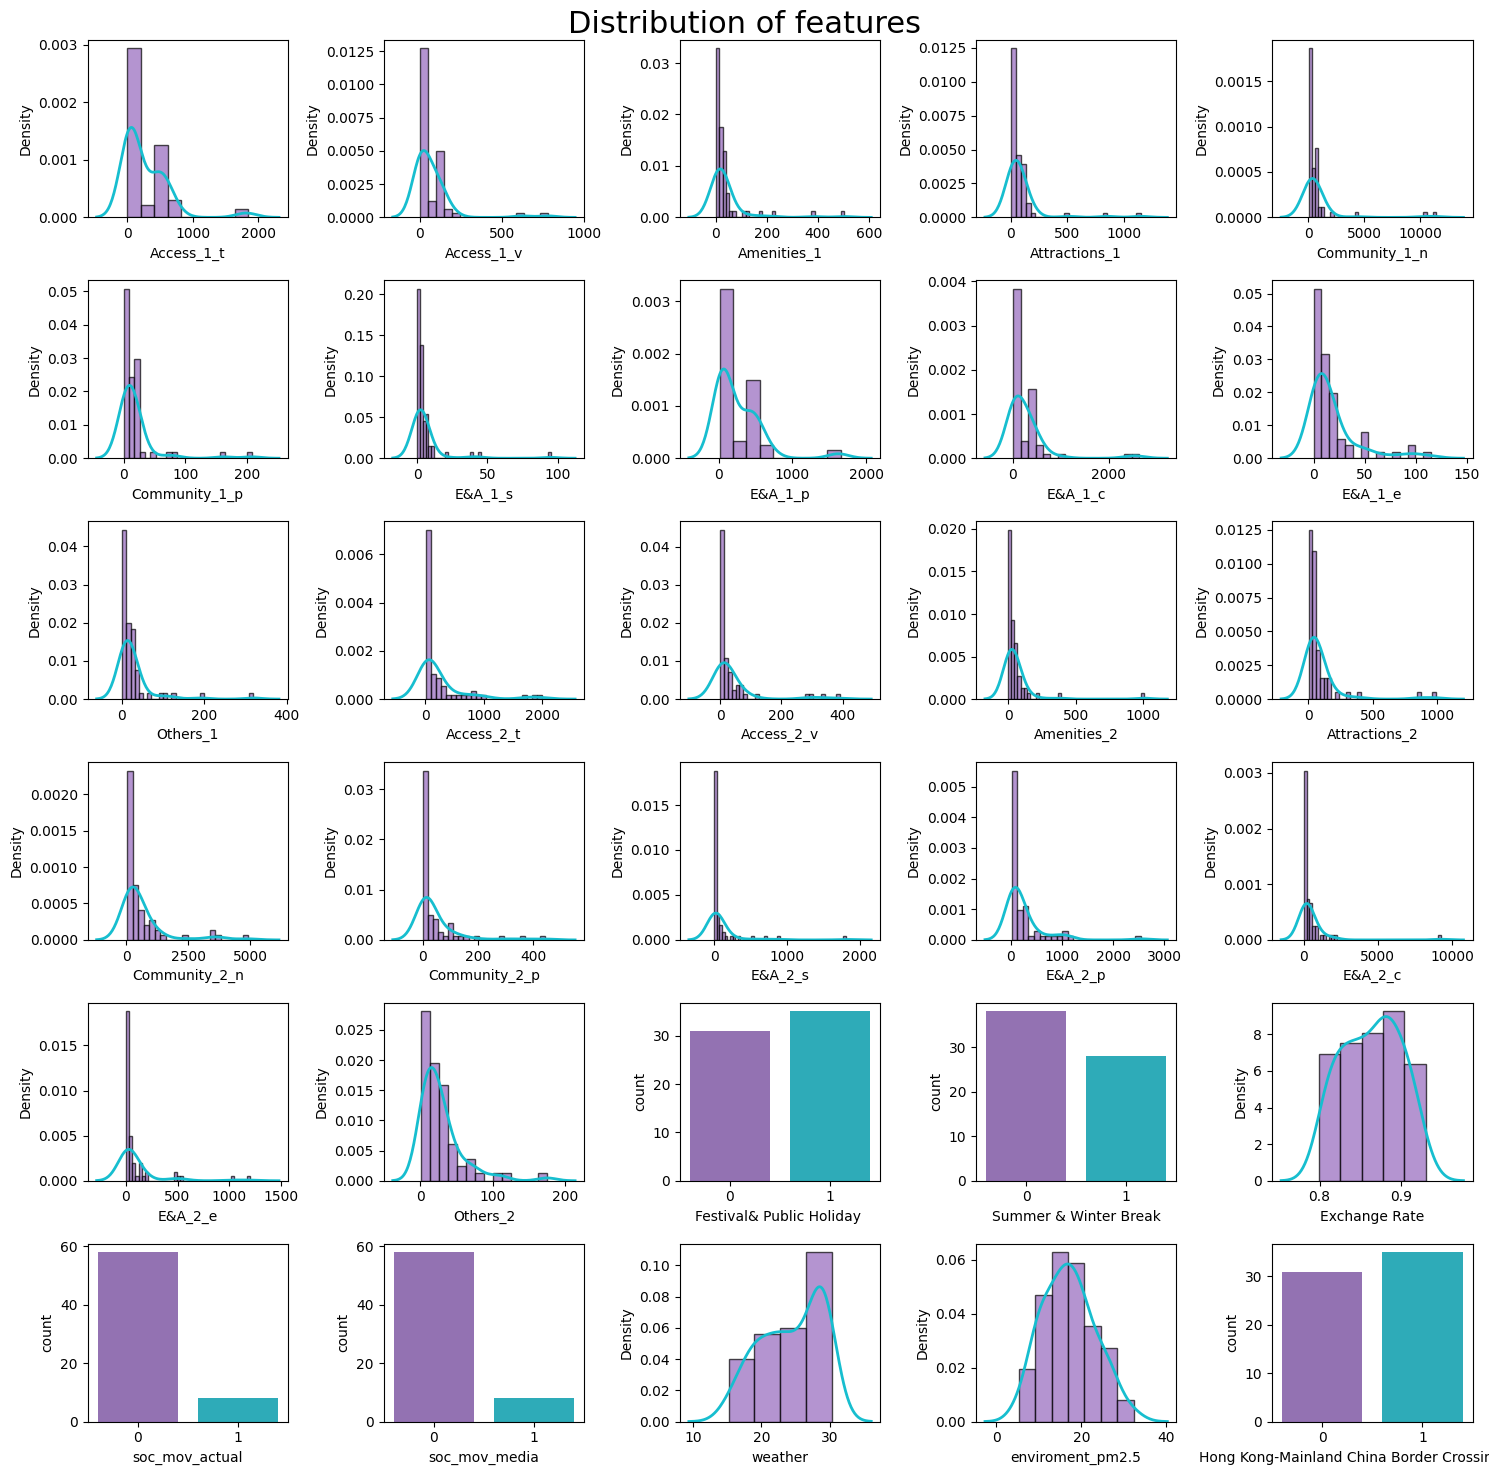

In [5]:
features_columns = data.drop(
    ['month_visit', "hotel_occupancy", "hotel_price"], axis=1)
palette = ['#9467bd', '#17becf']  # purple, cyan

# 计算行数和列数
num_rows = 6
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))


for i, column in enumerate(features_columns):
    ax = axs[i // num_cols][i % num_cols]
    if features_columns[column].nunique() <= 10:
        sns.countplot(x=column, data=features_columns, ax=ax, palette=palette)
    else:
        sns.distplot(features_columns[column], color=palette[0], hist=True, kde=True, ax=ax,
                     hist_kws={"edgecolor": "black",
                               "linewidth": 1, "alpha": 0.7},
                     kde_kws={"color": palette[1], "linewidth": 2})


# 添加大标题
fig.suptitle(f'Distribution of features', fontsize=22)


plt.tight_layout()
plt.show()

## 目标变量可视化

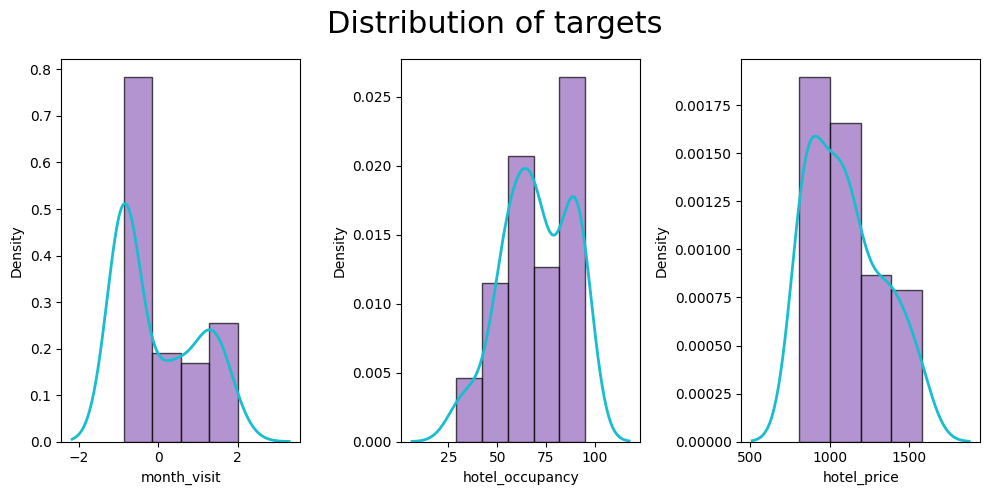

In [6]:
target_columns = data[['month_visit', "hotel_occupancy", "hotel_price"]]
palette = ['#9467bd', '#17becf']  # purple, cyan

# 计算行数和列数
num_rows = 1
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))


for i, column in enumerate(target_columns):
    if target_columns[column].nunique() <= 10:
        sns.countplot(x=column, data=target_columns,
                      ax=axs[i], palette=palette)
    else:
        sns.distplot(target_columns[column], color=palette[0], hist=True, kde=True, ax=axs[i],
                     hist_kws={"edgecolor": "black",
                               "linewidth": 1, "alpha": 0.7},
                     kde_kws={"color": palette[1], "linewidth": 2})


# 添加大标题
fig.suptitle(f'Distribution of targets', fontsize=22)


plt.tight_layout()
plt.show()

##  各变量与目标变量的散点图

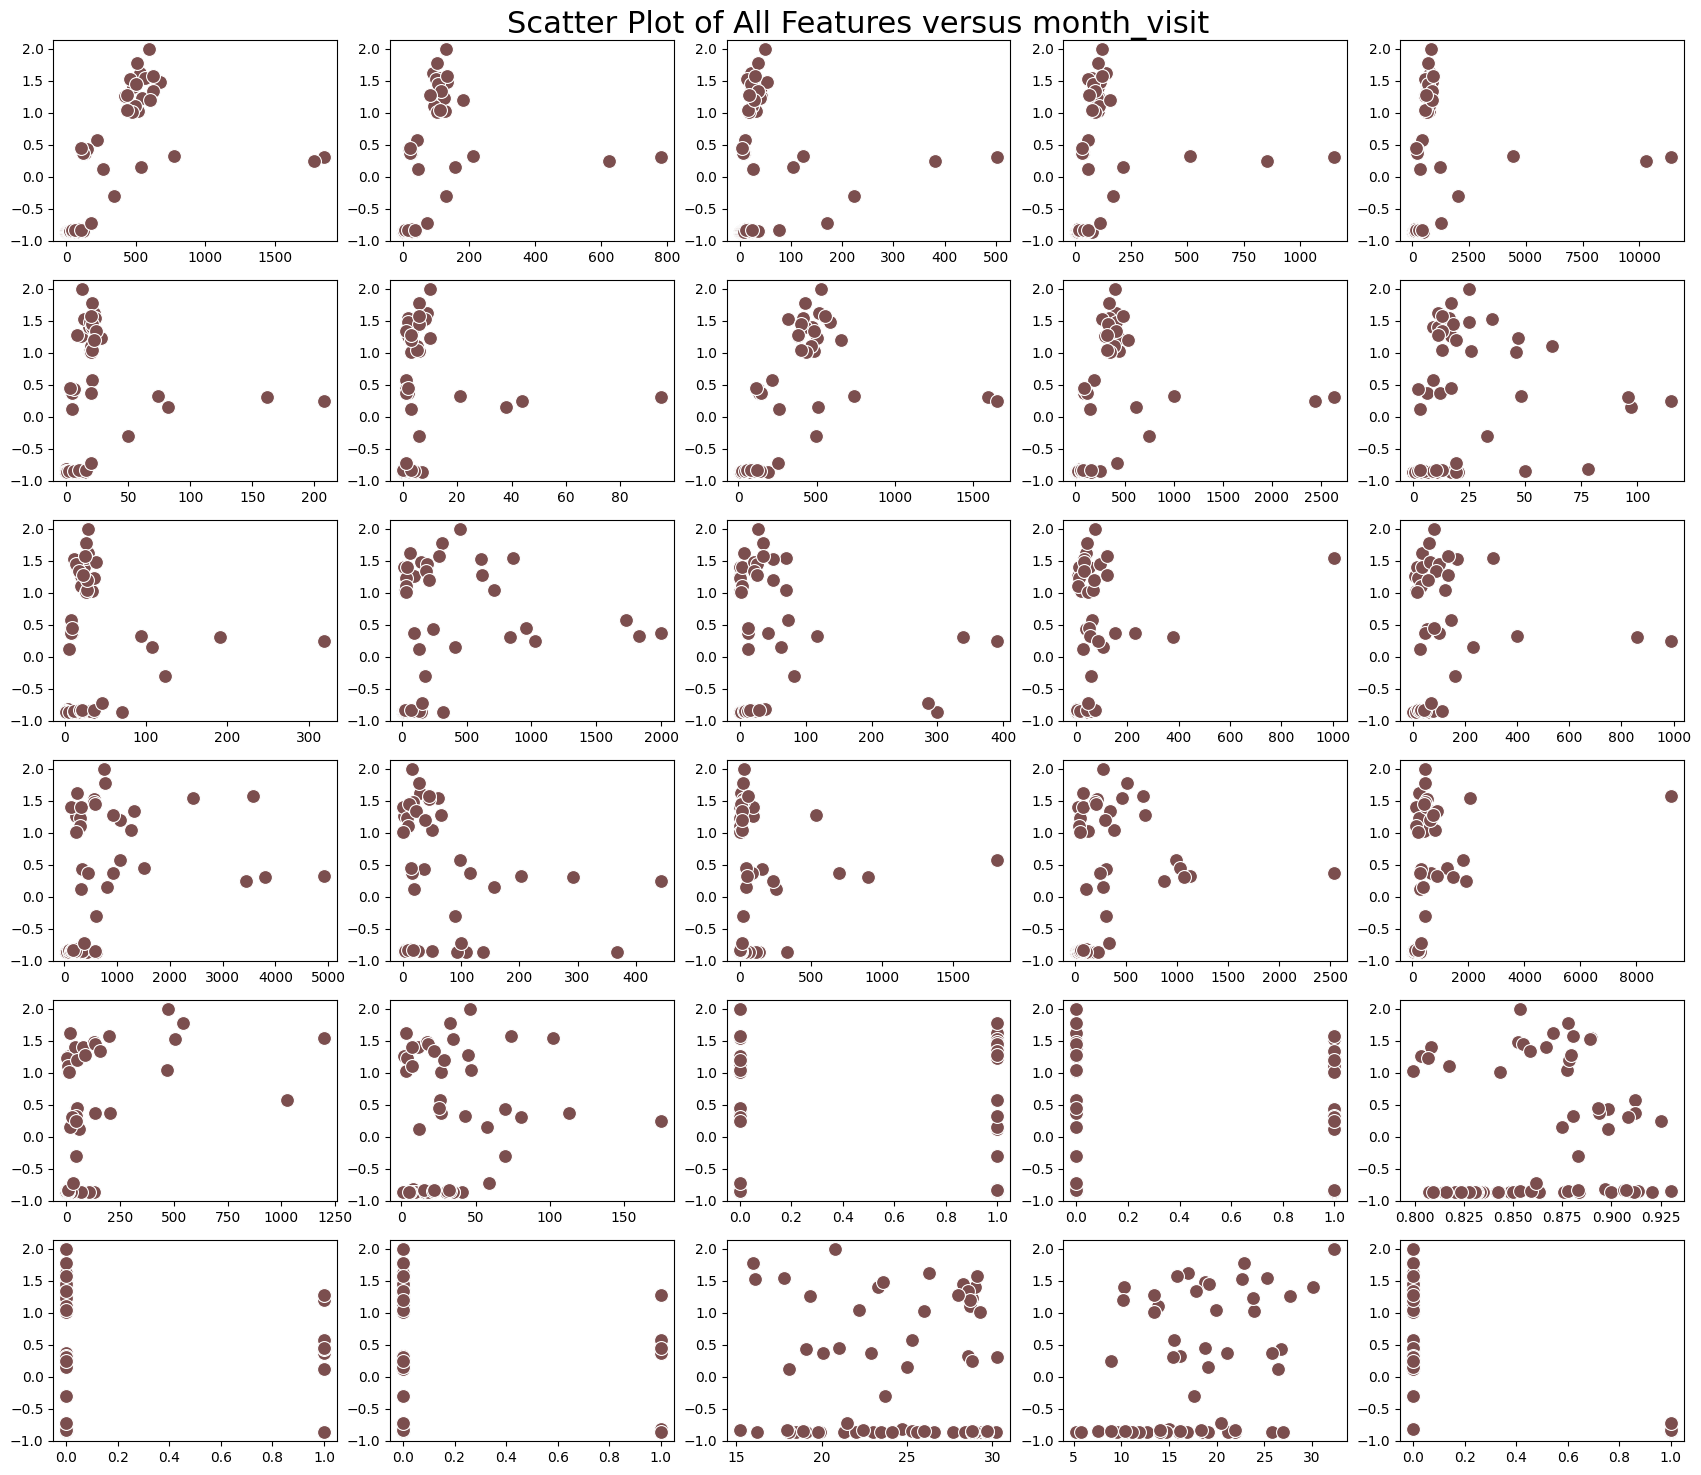

In [7]:
features_columns = data.drop(
    ['month_visit', "hotel_occupancy", "hotel_price"], axis=1)
palette = ['#9467bd', '#17becf']  # purple, cyan

# 计算行数和列数
num_rows = 6
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 15))

axs = axs.flatten()
for i, column in enumerate(features_columns):
    sns.scatterplot(data=data, x=column, y='month_visit',
                    ax=axs[i], color='#7b4e4e', s=100)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')


# 添加大标题
fig.suptitle(f'Scatter Plot of All Features versus month_visit', fontsize=22)


plt.tight_layout()
plt.show()

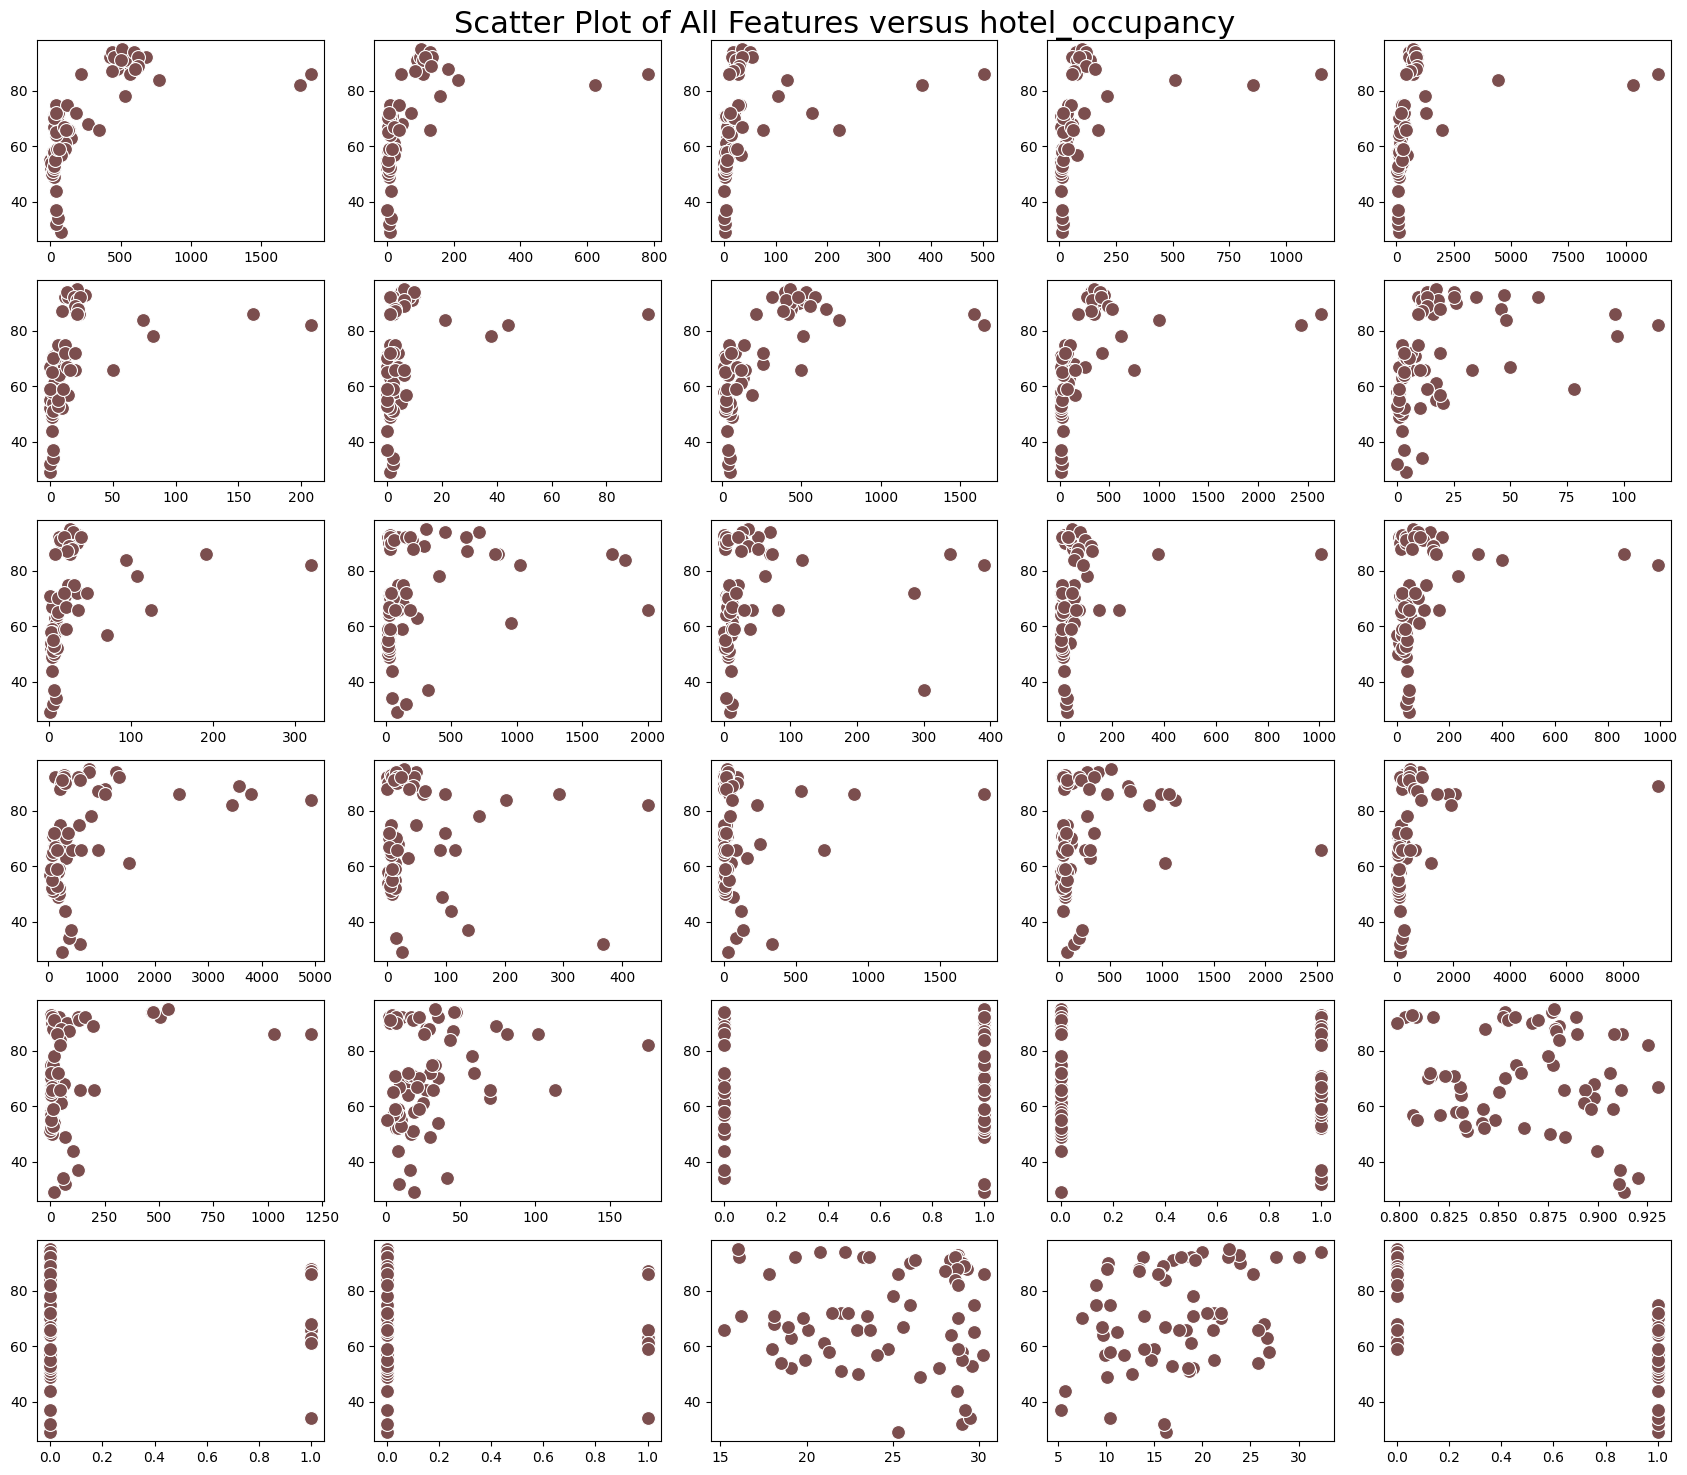

In [8]:
palette = ['#9467bd', '#17becf']  # purple, cyan

# 计算行数和列数
num_rows = 6
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 15))

axs = axs.flatten()
for i, column in enumerate(features_columns):
    sns.scatterplot(data=data, x=column, y='hotel_occupancy',
                    ax=axs[i], color='#7b4e4e', s=100)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')


# 添加大标题
fig.suptitle(
    f'Scatter Plot of All Features versus hotel_occupancy', fontsize=22)


plt.tight_layout()
plt.show()

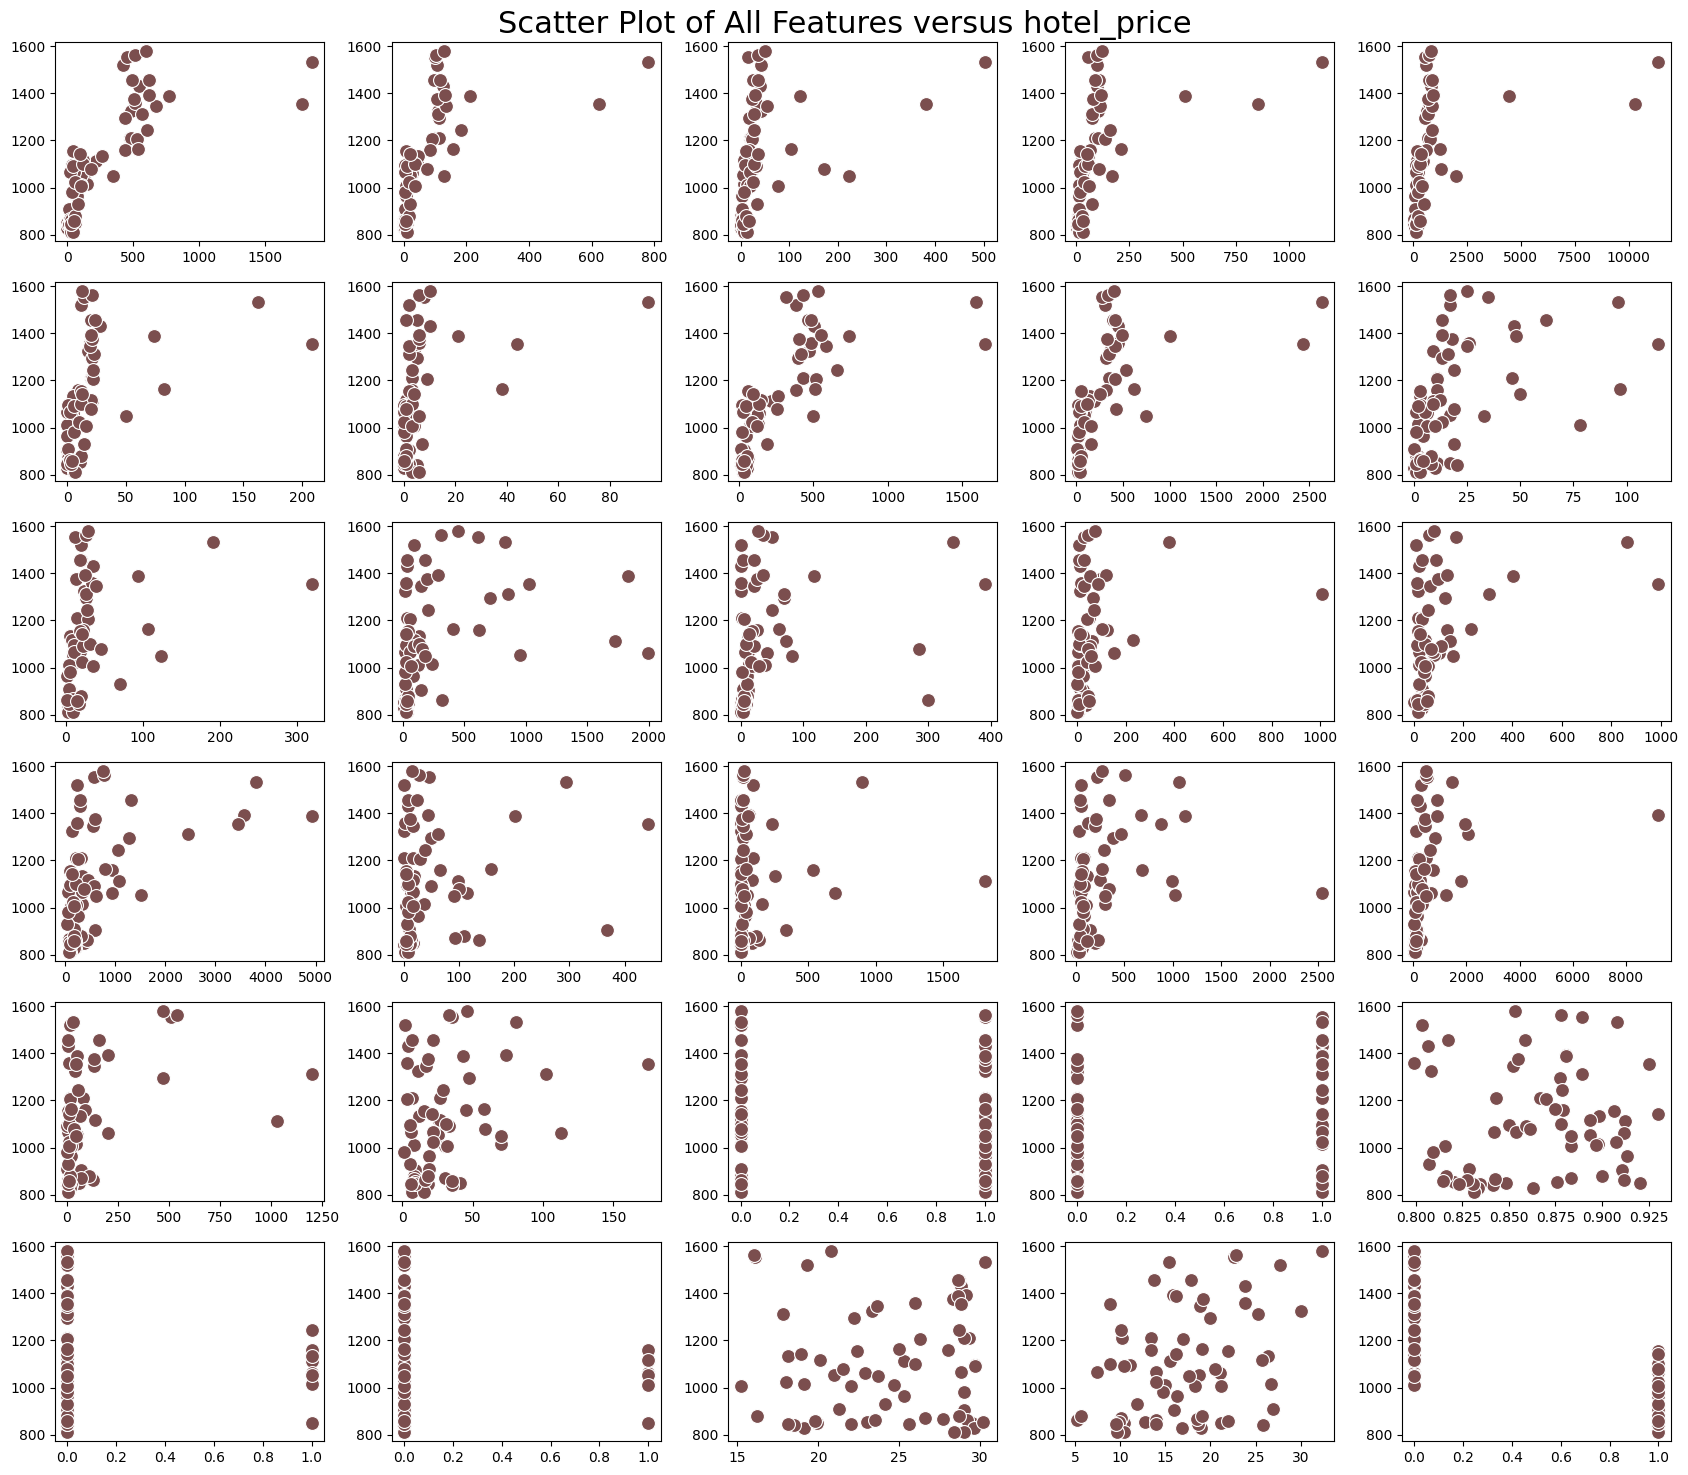

In [9]:
palette = ['#9467bd', '#17becf']  # purple, cyan

# 计算行数和列数
num_rows = 6
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 15))

axs = axs.flatten()
for i, column in enumerate(features_columns):
    sns.scatterplot(data=data, x=column, y='hotel_price',
                    ax=axs[i], color='#7b4e4e', s=100)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')


# 添加大标题
fig.suptitle(f'Scatter Plot of All Features versus hotel_price', fontsize=22)


plt.tight_layout()
plt.show()

## 自变量相关系数图

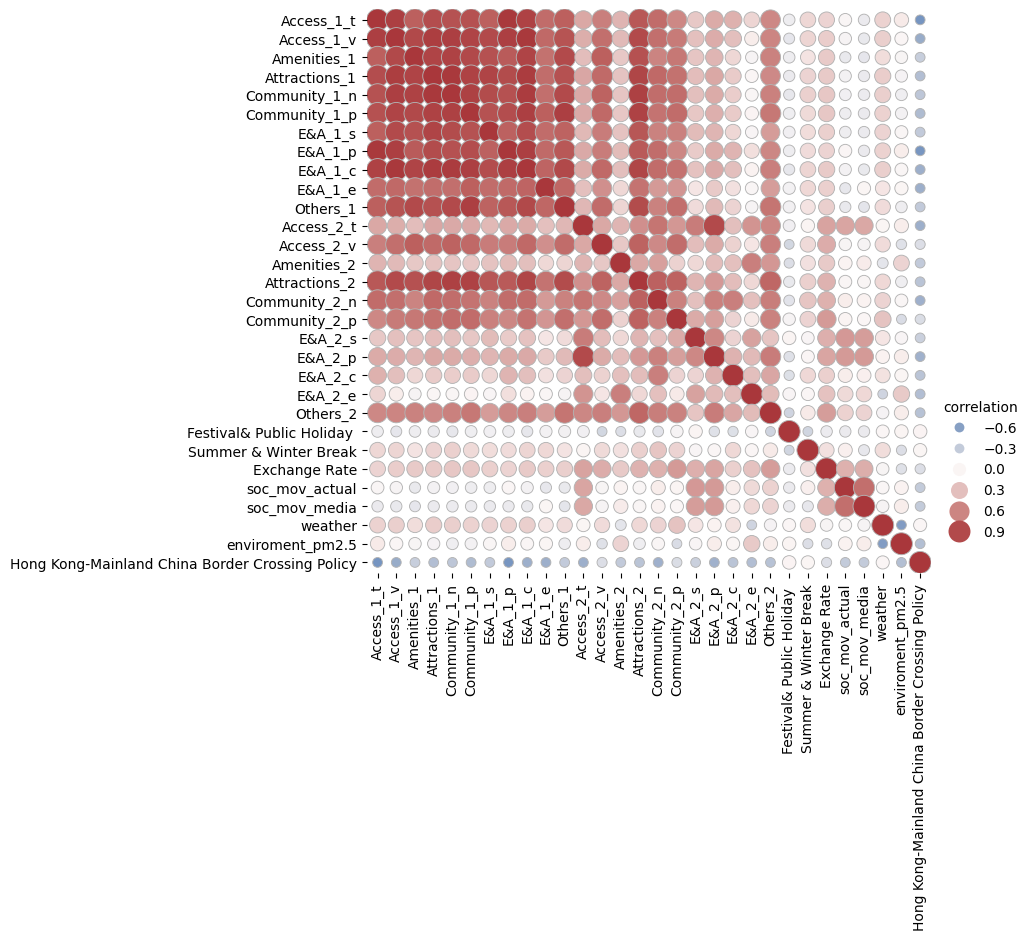

In [10]:
features_columns

# Compute a correlation matrix and convert to long-form
corr_mat = features_columns.corr().stack().reset_index(name="correlation")

corr_mat

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# 特征工程

## 探查是否有缺失值

In [11]:
data.isnull().sum().T

Access_1_t                                         0
Access_1_v                                         0
Amenities_1                                        0
Attractions_1                                      0
Community_1_n                                      0
Community_1_p                                      0
E&A_1_s                                            0
E&A_1_p                                            0
E&A_1_c                                            0
E&A_1_e                                            0
Others_1                                           0
Access_2_t                                         0
Access_2_v                                         0
Amenities_2                                        0
Attractions_2                                      0
Community_2_n                                      0
Community_2_p                                      0
E&A_2_s                                            0
E&A_2_p                                       

## 描述性统计

In [52]:
# 筛选出数值型变量和分类型变量
numeric_variables = []
categorical_variables = []
for column in features_columns.columns:
    if features_columns[column].nunique() <= 2:
        categorical_variables.append(column)
    else:
        numeric_variables.append(column)

numeric_features = features_columns[numeric_variables]
categorical_features = features_columns[categorical_variables]

### 数值型变量

In [13]:
features_columns[numeric_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
Access_1_t,66.0,273.272727,358.643708,1.000000,39.250000,105.500000,482.500000,1854.0000
Access_1_v,66.0,70.151515,126.140367,0.000000,6.250000,20.500000,106.500000,781.0000
Amenities_1,66.0,39.151515,81.957445,0.000000,5.250000,18.000000,31.750000,503.0000
Attractions_1,66.0,89.363636,180.351591,6.000000,13.250000,37.000000,99.250000,1153.0000
Community_1_n,66.0,799.590909,1893.856952,46.000000,147.000000,294.000000,715.250000,11381.0000
Community_1_p,66.0,18.136364,33.510910,0.000000,2.000000,10.500000,20.000000,208.0000
E&A_1_s,66.0,5.515152,13.415539,0.000000,1.000000,2.000000,5.000000,95.0000
E&A_1_p,66.0,254.272727,320.194823,10.000000,35.000000,118.500000,428.750000,1654.0000
E&A_1_c,66.0,263.681818,456.021024,10.000000,22.750000,90.000000,350.000000,2634.0000
E&A_1_e,66.0,18.090909,24.449463,0.000000,3.000000,10.500000,19.000000,115.0000


### 分类型变量

In [14]:
features_columns[categorical_variables].astype("category").describe()

,Festival& Public Holiday,Summer & Winter Break,soc_mov_actual,soc_mov_media,Hong Kong-Mainland China Border Crossing Policy
count,66,66,66,66,66
unique,2,2,2,2,2
top,1,0,0,0,1
freq,35,38,58,58,35


## 数据标准化变换

In [15]:
scaler = StandardScaler()

scaled_num_feature = pd.DataFrame(scaler.fit_transform(
    numeric_features), columns=numeric_features.columns)

scaled_num_feature

,Access_1_t,Access_1_v,Amenities_1,Attractions_1,Community_1_n,Community_1_p,E&A_1_s,E&A_1_p,E&A_1_c,E&A_1_e,...,Community_2_n,Community_2_p,E&A_2_s,E&A_2_p,E&A_2_c,E&A_2_e,Others_2,Exchange Rate,weather,enviroment_pm2.5
0,0.417871,0.278385,0.035022,0.059428,-0.110985,-0.184519,-0.264029,0.398815,0.093510,-0.044961,...,-0.411872,-0.549722,-0.011807,-0.485786,-0.159493,-0.399820,-0.893906,-1.700375,-1.151925,1.753057
1,0.589260,0.310338,0.022727,0.065015,-0.071080,-0.004100,-0.113805,0.685194,0.212833,-0.374674,...,-0.511742,-0.561856,-0.348490,-0.536364,-0.315297,-0.270058,-0.590835,-1.553447,-0.252197,2.145514
2,0.687598,0.454130,-0.087928,0.081776,-0.020001,0.025969,0.036418,0.722959,0.400656,0.325966,...,-0.405564,-0.537587,-0.356056,-0.291058,-0.058178,-0.413723,-0.860231,-1.816223,0.355120,1.123061
3,0.769078,0.438153,-0.001863,0.042666,0.015116,0.296597,0.336864,0.779605,0.405075,1.191463,...,-0.343540,-0.476916,-0.359839,-0.480728,-0.209725,-0.436895,-0.826557,-1.601482,0.984930,1.112734
4,0.617357,0.198500,-0.173992,0.098538,-0.029578,0.056039,-0.038694,0.653724,0.279123,1.809674,...,-0.345642,-0.464782,-0.359839,-0.513604,-0.311040,-0.427626,-0.725533,-1.307625,0.962437,-0.539714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.207148,0.470107,2.260409,0.450533,0.641361,0.958130,0.036418,0.767017,1.067981,0.614465,...,-0.011341,0.530233,-0.269048,0.143919,-0.021568,-0.246886,1.395963,0.557231,-0.162224,0.087028
62,0.735362,0.701771,0.797309,0.685196,0.231136,1.920360,2.439990,0.804782,0.780722,3.252168,...,0.193655,1.343233,-0.200955,0.070580,-0.085423,-0.372014,0.991868,0.319885,0.130188,0.325542
63,1.409678,1.133146,1.030913,2.361360,1.944399,1.679803,1.163092,1.522305,1.635870,1.232677,...,4.520652,1.889278,-0.151777,2.225234,0.331757,-0.242251,0.486750,0.478116,0.939944,-0.151487
64,4.441289,5.678560,5.702995,5.942764,5.630042,4.325936,6.721352,4.206722,5.237657,3.210954,...,3.351648,2.993502,3.056167,2.073498,0.816197,-0.321036,1.766383,1.263616,1.322328,-0.270744


In [16]:
scaled_data = pd.concat([scaled_num_feature, categorical_features], axis=1)

scaled_data

,Access_1_t,Access_1_v,Amenities_1,Attractions_1,Community_1_n,Community_1_p,E&A_1_s,E&A_1_p,E&A_1_c,E&A_1_e,...,E&A_2_e,Others_2,Exchange Rate,weather,enviroment_pm2.5,Festival& Public Holiday,Summer & Winter Break,soc_mov_actual,soc_mov_media,Hong Kong-Mainland China Border Crossing Policy
0,0.417871,0.278385,0.035022,0.059428,-0.110985,-0.184519,-0.264029,0.398815,0.093510,-0.044961,...,-0.399820,-0.893906,-1.700375,-1.151925,1.753057,0,0,0,0,0
1,0.589260,0.310338,0.022727,0.065015,-0.071080,-0.004100,-0.113805,0.685194,0.212833,-0.374674,...,-0.270058,-0.590835,-1.553447,-0.252197,2.145514,1,0,0,0,0
2,0.687598,0.454130,-0.087928,0.081776,-0.020001,0.025969,0.036418,0.722959,0.400656,0.325966,...,-0.413723,-0.860231,-1.816223,0.355120,1.123061,0,0,0,0,0
3,0.769078,0.438153,-0.001863,0.042666,0.015116,0.296597,0.336864,0.779605,0.405075,1.191463,...,-0.436895,-0.826557,-1.601482,0.984930,1.112734,1,1,0,0,0
4,0.617357,0.198500,-0.173992,0.098538,-0.029578,0.056039,-0.038694,0.653724,0.279123,1.809674,...,-0.427626,-0.725533,-1.307625,0.962437,-0.539714,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.207148,0.470107,2.260409,0.450533,0.641361,0.958130,0.036418,0.767017,1.067981,0.614465,...,-0.246886,1.395963,0.557231,-0.162224,0.087028,1,0,0,0,0
62,0.735362,0.701771,0.797309,0.685196,0.231136,1.920360,2.439990,0.804782,0.780722,3.252168,...,-0.372014,0.991868,0.319885,0.130188,0.325542,1,0,0,0,0
63,1.409678,1.133146,1.030913,2.361360,1.944399,1.679803,1.163092,1.522305,1.635870,1.232677,...,-0.242251,0.486750,0.478116,0.939944,-0.151487,1,1,0,0,0
64,4.441289,5.678560,5.702995,5.942764,5.630042,4.325936,6.721352,4.206722,5.237657,3.210954,...,-0.321036,1.766383,1.263616,1.322328,-0.270744,0,1,0,0,0


# 模型建立

## 随机森林基准模型

In [71]:
y = data[["month_visit", "hotel_occupancy", "hotel_price"]]

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y,
                                                    test_size=0.3,
                                                    shuffle=True)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

rf_model = RandomForestRegressor()

# 在训练集上训练随机森林回归模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
# 计算均方误差（Mean Squared Error）
mse = -cross_val_score(rf_model, X_test, y_test, cv=4,
                       scoring='neg_mean_squared_error').mean()
print("均方误差：", mse)


def cau_mse(model, y_train, y_test, y_train_pred, y_pred):
    target_columns = ["month_visit", "hotel_occupancy", "hotel_price"]
    df = pd.DataFrame(index=range(3), columns=["Train_mse", "Test_mse"])
    for i, column in enumerate(target_columns):
        train_mse = -cross_val_score(model, y_train[:, [i]], y_train_pred[:, [
                                     i]], cv=4, scoring="neg_mean_squared_error").mean()
        test_mse = -cross_val_score(model, y_test[:, [i]], y_pred[:, [
                                    i]], cv=4, scoring="neg_mean_squared_error").mean()
        df.iloc[i] = [train_mse, test_mse]
        df.index = target_columns
    return df


rf_result = cau_mse(rf_model, y_train, y_test, y_train_pred, y_pred)

rf_result

均方误差： 4385.659055044902


,Train_mse,Test_mse
month_visit,0.020234,0.076292
hotel_occupancy,13.801743,28.526981
hotel_price,2305.829034,18145.951656


## Xgboost模型搭建

In [72]:
from sklearn.metrics import mean_squared_error

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train, y_train)

# 进行预测
y_pred = XGBmodel.predict(X_test)
y_train_pred = XGBmodel.predict(X_train)

mse = -cross_val_score(XGBmodel, X_test, y_test, cv=4,
                       scoring='neg_mean_squared_error').mean()
print("均方误差：", mse)

xgb_result = cau_mse(XGBmodel, y_train, y_test, y_train_pred, y_pred)

xgb_result

均方误差： 6221.697785510326


,Train_mse,Test_mse
month_visit,0.032263,0.553537
hotel_occupancy,20.008484,128.954859
hotel_price,718.27845,12541.822754


## 超参数调优

In [74]:
def objective(trial):
    """定义目标函数"""

    # 定义超参数
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 500, 750),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        "colsample_bylevel": trial.suggest_float('colsample_bylevel', 0.2, 1),
        "colsample_bynode": trial.suggest_float('colsample_bynode', 0.2, 1),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e2),
        'n_estimators': trial.suggest_int('n_estimators', 10, 400),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-5, 1e1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    # 创建模型并拟合训练集
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    cv = -cross_val_score(model, X_train, y_train, cv=4,
                          scoring='neg_mean_squared_error').mean()
    return cv


# 执行超参数搜索
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# 输出结果
print('Best trial: score {}, params {}'.format(
    study.best_trial.value, study.best_trial.params))

[I 2023-12-14 11:49:17,375] A new study created in memory with name: no-name-108119de-df2d-4508-b887-e6290c05c32c
[I 2023-12-14 11:49:28,703] Trial 11 finished with value: 10596.503532246817 and parameters: {'n_estimators': 551, 'colsample_bytree': 0.6240217484576777, 'colsample_bylevel': 0.9461288165052237, 'colsample_bynode': 0.838066023383458, 'learning_rate': 0.01038392652439197, 'max_depth': 8, 'alpha': 0.0003567004612516727, 'subsample': 0.25438981603808253, 'gamma': 0.042848130446534995, 'min_child_weight': 7}. Best is trial 11 with value: 10596.503532246817.
[I 2023-12-14 11:49:30,469] Trial 2 finished with value: 5109.761171110064 and parameters: {'n_estimators': 503, 'colsample_bytree': 0.28579380829366374, 'colsample_bylevel': 0.8254700570467182, 'colsample_bynode': 0.5028764331222122, 'learning_rate': 0.09214642231184215, 'max_depth': 4, 'alpha': 1.307174949699862, 'subsample': 0.5151521329581781, 'gamma': 5.208309550957494, 'min_child_weight': 8}. Best is trial 2 with valu

[I 2023-12-14 11:49:49,611] Trial 20 finished with value: 5018.438244618343 and parameters: {'n_estimators': 525, 'colsample_bytree': 0.4392754196782078, 'colsample_bylevel': 0.8116435671228688, 'colsample_bynode': 0.5258723236405338, 'learning_rate': 0.05760182891700541, 'max_depth': 6, 'alpha': 46.83147135128386, 'subsample': 0.5188122010240456, 'gamma': 0.3772165273933759, 'min_child_weight': 1}. Best is trial 12 with value: 4606.492954615181.
[I 2023-12-14 11:49:50,869] Trial 5 finished with value: 5768.362145063136 and parameters: {'n_estimators': 555, 'colsample_bytree': 0.7227599877139883, 'colsample_bylevel': 0.78042973142602, 'colsample_bynode': 0.4734775015365066, 'learning_rate': 0.0631569057230863, 'max_depth': 10, 'alpha': 9.197226044970872e-05, 'subsample': 0.9539022339378368, 'gamma': 0.00014813216352808852, 'min_child_weight': 4}. Best is trial 12 with value: 4606.492954615181.
[I 2023-12-14 11:49:51,487] Trial 23 finished with value: 7047.6681983546805 and parameters: 

[I 2023-12-14 11:50:09,712] Trial 33 finished with value: 6035.727347400406 and parameters: {'n_estimators': 650, 'colsample_bytree': 0.1323126444778508, 'colsample_bylevel': 0.9869577716360726, 'colsample_bynode': 0.7117093327017432, 'learning_rate': 0.18195158687784893, 'max_depth': 2, 'alpha': 0.2675263461454824, 'subsample': 0.6697584121672494, 'gamma': 0.00033277830365805594, 'min_child_weight': 3}. Best is trial 12 with value: 4606.492954615181.
[I 2023-12-14 11:50:11,041] Trial 37 finished with value: 4776.355685966095 and parameters: {'n_estimators': 737, 'colsample_bytree': 0.11659199454303754, 'colsample_bylevel': 0.6657570489104891, 'colsample_bynode': 0.6909573596078572, 'learning_rate': 0.13608660313858228, 'max_depth': 1, 'alpha': 0.21645112531489372, 'subsample': 0.1532140028479151, 'gamma': 0.010179485305869292, 'min_child_weight': 3}. Best is trial 12 with value: 4606.492954615181.
[I 2023-12-14 11:50:12,140] Trial 38 finished with value: 5024.948863426629 and paramete

Best trial: score 4606.492954615181, params {'n_estimators': 706, 'colsample_bytree': 0.6672420208265888, 'colsample_bylevel': 0.6317669008353168, 'colsample_bynode': 0.5761573593246477, 'learning_rate': 0.16087084086561568, 'max_depth': 2, 'alpha': 12.859147697509025, 'subsample': 0.3060753883306703, 'gamma': 0.005849737612210743, 'min_child_weight': 5}


In [75]:
xgb_params = study.best_trial.params
# Build the XGBoost model
optuna_XGBModel = XGBRegressor(**xgb_params,)
optuna_XGBModel.fit(X_train, y_train)

# 进行预测
y_pred = optuna_XGBModel.predict(X_test)
y_train_pred = optuna_XGBModel.predict(X_train)

# 评估模型
mse = -cross_val_score(optuna_XGBModel, X_test, y_test, cv=4,
                       scoring='neg_mean_squared_error').mean()
print("均方误差：", mse)

optuna_xgb = cau_mse(optuna_XGBModel, y_train, y_test, y_train_pred, y_pred)

optuna_xgb

均方误差： 5939.092142303119


,Train_mse,Test_mse
month_visit,0.102559,0.102676
hotel_occupancy,25.015544,106.743217
hotel_price,1708.142517,25158.333008


In [21]:
result = pd.concat([rf_result, xgb_result, optuna_xgb], axis=1)

result.columns = ["rf_train_mse", "rf_test_mse", "xgb_train_mse",
                  "xgb_train_mse", "optuna_xgb_train_mse", "optuna_xgb_test_mse"]

result

,rf_train_mse,rf_test_mse,xgb_train_mse,xgb_train_mse,optuna_xgb_train_mse,optuna_xgb_test_mse
month_visit,0.030228,0.032711,0.030625,0.138005,0.324408,0.321838
hotel_occupancy,6.639001,111.080674,7.340193,136.324915,6.641655,168.466005
hotel_price,1160.074467,24617.419896,937.132118,20769.890747,832.937428,24758.877808


## 预测指标

### 分类型预测变量

In [22]:
categorical_features

,Festival& Public Holiday,Summer & Winter Break,soc_mov_actual,soc_mov_media,Hong Kong-Mainland China Border Crossing Policy
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,1,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
61,1,0,0,0,0
62,1,0,0,0,0
63,1,1,0,0,0
64,0,1,0,0,0


### 数值型预测变量

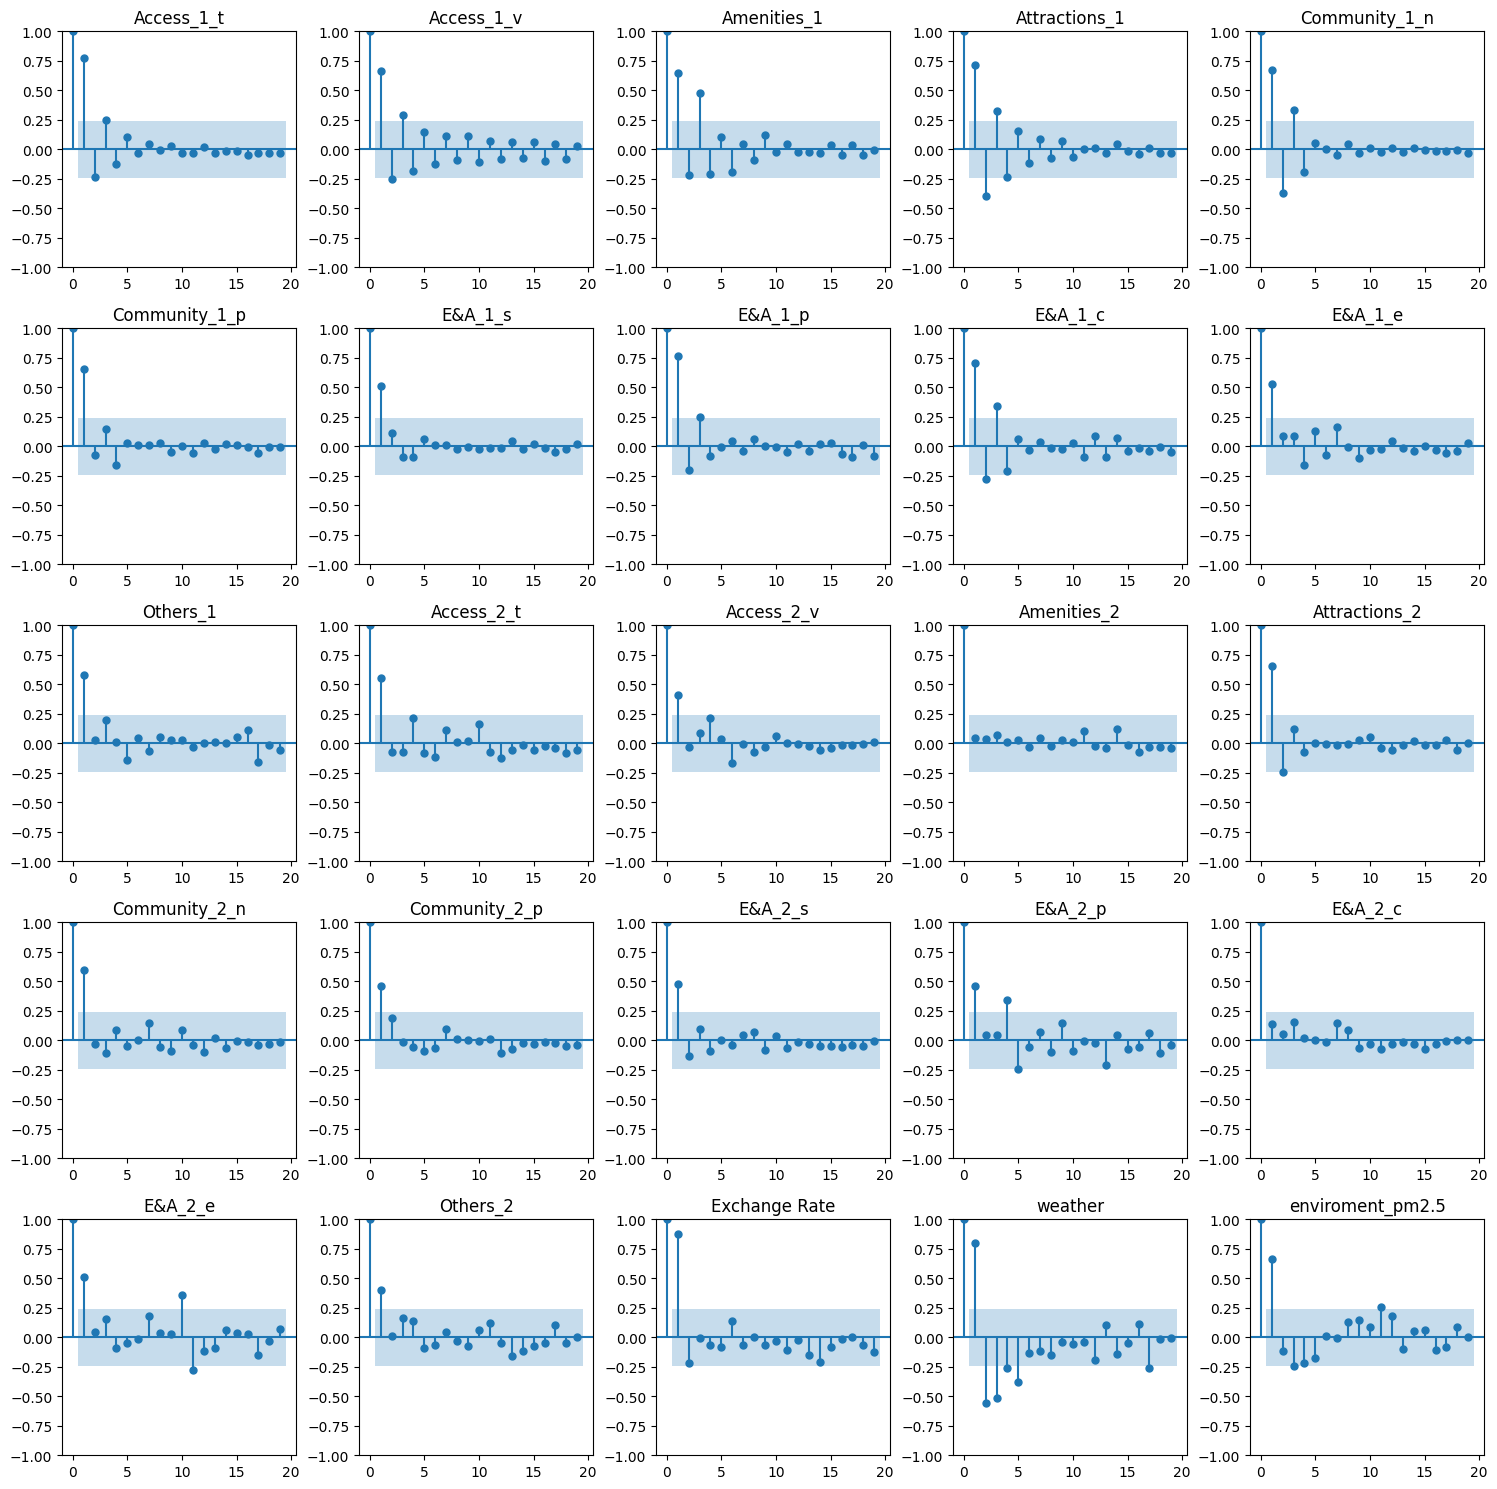

In [23]:
# 绘制偏自相关系数图
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 创建一个5x5的子图布局

for i, ax in enumerate(axes.flatten()):
    if i < numeric_features.shape[1]:  # 确保不超过df的列数
        variable_name = numeric_features.columns[i]
        plot_pacf(numeric_features[variable_name], ax=ax, title=variable_name)

plt.tight_layout()  # 调整子图之间的间距
plt.show()

In [91]:
# 利用Xgboost筛选最优滞后期数，然后利用AR模型计算自变量值
X_pred = []
ar_result = pd.DataFrame(columns=["lag","values"])

def create_dataset(data, column, lag):
    cau_lag = data[[column]]
    cau_lag["lag"] = cau_lag[column].shift(lag)
    y = cau_lag[column]
    x = cau_lag["lag"]

    return x[lag:], y[lag:]


for column in numeric_features.columns:

    # 模型训练和评估
    best_lag = 0
    best_mse = float('inf')

    for lag in range(1, 5):
        # 创建监督学习数据集
        X_train, y_train = create_dataset(data, column, lag)

        # 训练Xgboost回归模型
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # 预测并计算均方误差
        y_pred = model.predict(X_train)
        mse = mean_squared_error(y_train, y_pred)

        # 更新最佳滞后阶数和均方误差
        if mse < best_mse:
            best_lag = lag
            best_mse = mse

    model_ar = AutoReg(y_train, lags=best_lag)
    model_ar_fit = model_ar.fit()

    # 预测未来值
    future_values = model_ar_fit.predict(start=len(data), end=len(data))
    X_pred.append(future_values.values[0])
    # print(f"变量{column}的最最佳滞后阶数为{best_lag},使用AR模型预测得到结果为{future_values.values[0]}")
    # print()
    ar_result.loc[column] = [best_lag,future_values.values[0]]
    
ar_result

,lag,values
Access_1_t,2.0,2235.253303
Access_1_v,1.0,553.691750
Amenities_1,1.0,246.430858
Attractions_1,1.0,879.695770
Community_1_n,4.0,140054.492131
Community_1_p,1.0,829.187119
E&A_1_s,1.0,9.061125
E&A_1_p,1.0,2565.404751
E&A_1_c,1.0,3885.172975
E&A_1_e,1.0,31.963661


In [82]:
# 标准化
scaled_X_pred = []
for i in range(len(X_pred)):
    scaled_x = (X_pred[i] - numeric_features.mean()[i]) / \
        numeric_features.std()[i]
    scaled_X_pred.append(scaled__x)

# 加入分类型变量
cat_X_pred = [1, 0, 0, 0, 0]

X = np.array(scaled_X_pred+cat_X_pred).reshape(1, 30)
X

array([[0.04693016, 0.04693016, 0.04693016, 0.04693016, 0.04693016,
        0.04693016, 0.04693016, 0.04693016, 0.04693016, 0.04693016,
        0.04693016, 0.04693016, 0.04693016, 0.04693016, 0.04693016,
        0.04693016, 0.04693016, 0.04693016, 0.04693016, 0.04693016,
        0.04693016, 0.04693016, 0.04693016, 0.04693016, 0.04693016,
        1.        , 0.        , 0.        , 0.        , 0.        ]])

### 预测目标变量

In [84]:
Y_pred = optuna_XGBModel.predict(X)

pd.DataFrame(Y_pred,columns=["month_visit", "hotel_occupancy", "hotel_price"])

,month_visit,hotel_occupancy,hotel_price
0,0.395767,75.402931,1240.989624
